In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading the dataset

In [2]:
original_df=pd.read_csv("Road Accident Data.csv")
accident_df=original_df.copy()

In [ ]:
accident_df.columns=accident_df.columns.str.lower()#convert the column names to lowercase letter

In [ ]:
accident_df.columns#to  find all the column names

Index(['accident_index', 'accident date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'latitude', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards', 'longitude',
       'number_of_casualties', 'number_of_vehicles', 'police_force',
       'road_surface_conditions', 'road_type', 'speed_limit', 'time',
       'urban_or_rural_area', 'weather_conditions', 'vehicle_type'],
      dtype='object')

In [ ]:
accident_df.shape#to find the number of rowss and co;umns

(307973, 21)

In [ ]:
accident_df.dtypes#to display the data type of each column

accident_index                 object
accident date                  object
day_of_week                    object
junction_control               object
junction_detail                object
accident_severity              object
latitude                      float64
light_conditions               object
local_authority_(district)     object
carriageway_hazards            object
longitude                     float64
number_of_casualties            int64
number_of_vehicles              int64
police_force                   object
road_surface_conditions        object
road_type                      object
speed_limit                     int64
time                           object
urban_or_rural_area            object
weather_conditions             object
vehicle_type                   object
dtype: object

Inspecting the dataset

In [7]:
accident_df.head()#to view the first 5 rows

,accident_index,accident date,day_of_week,junction_control,junction_detail,accident_severity,latitude,light_conditions,local_authority_(district),carriageway_hazards,...,number_of_casualties,number_of_vehicles,police_force,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [ ]:
accident_df.info()#to get more informattion on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   accident_index              307973 non-null  object 
 1   accident date               307973 non-null  object 
 2   day_of_week                 307973 non-null  object 
 3   junction_control            307973 non-null  object 
 4   junction_detail             307973 non-null  object 
 5   accident_severity           307973 non-null  object 
 6   latitude                    307973 non-null  float64
 7   light_conditions            307973 non-null  object 
 8   local_authority_(district)  307973 non-null  object 
 9   carriageway_hazards         5424 non-null    object 
 10  longitude                   307973 non-null  float64
 11  number_of_casualties        307973 non-null  int64  
 12  number_of_vehicles          307973 non-null  int64  
 13  police_force  

In [ ]:
accident_df.describe()#to get statiscal information

,latitude,longitude,number_of_casualties,number_of_vehicles,speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


Data cleaning

1. Removal of unneccessary columnns

In [10]:
accident_df=accident_df.drop(columns=['latitude', 'longitude','police_force'], axis=1)

Handling missing values

In [11]:
accident_df.isnull().sum()

accident_index                     0
accident date                      0
day_of_week                        0
junction_control                   0
junction_detail                    0
accident_severity                  0
light_conditions                   0
local_authority_(district)         0
carriageway_hazards           302549
number_of_casualties               0
number_of_vehicles                 0
road_surface_conditions            0
road_type                          0
speed_limit                        0
time                              17
urban_or_rural_area                0
weather_conditions                 0
vehicle_type                       0
dtype: int64

In [12]:
accident_df=accident_df.dropna(how='all')

In [13]:
accident_df['time']=accident_df['time'].fillna('Unknown')

In [14]:
accident_df['carriageway_hazards']=accident_df['carriageway_hazards'].fillna('No Data')

In [15]:
print(accident_df['carriageway_hazards'].isnull().sum())

0


In [16]:
print(accident_df['time'].isnull().sum())

0


In [17]:
accident_df.isnull().sum()

accident_index                0
accident date                 0
day_of_week                   0
junction_control              0
junction_detail               0
accident_severity             0
light_conditions              0
local_authority_(district)    0
carriageway_hazards           0
number_of_casualties          0
number_of_vehicles            0
road_surface_conditions       0
road_type                     0
speed_limit                   0
time                          0
urban_or_rural_area           0
weather_conditions            0
vehicle_type                  0
dtype: int64

Handling duplicates

In [18]:
accident_df.duplicated().sum()

np.int64(0)

In [19]:
accident_df= accident_df.drop_duplicates(keep='first')

Preprocessing

Data type conversion

In [20]:
#accident_df['time description']=' '

In [21]:
accident_df['time description']=accident_df['time'].str.split(':').str.get(0)


In [22]:

def show_time(time):
    try:
        time = int(time)
    except (ValueError, TypeError):
        return 'invalid time'

    if 0<=time<6:
        return 'Late Night/Early morning'
    elif 6<=time<12:
        return 'Morning'
    elif 12<=time<16:
        return 'Afternoon'
    elif 16<=time<19:
        return 'Evening'
    elif 19<=time<24:
        return 'Night'
    else:
        return 'invalid time'

In [23]:
accident_df['time description']=accident_df['time description'].apply(show_time)

In [24]:
accident_df

,accident_index,accident date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority_(district),carriageway_hazards,number_of_casualties,number_of_vehicles,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,time description
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,Afternoon
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,No Data,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,Morning
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,No Data,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,Afternoon
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,2,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc,Morning
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,No Data,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,No Data,2,1,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car,Morning
307969,BS0307970,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,No Data,1,1,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car,Late Night/Early morning
307970,BS0307971,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Highland,No Data,1,3,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car,Morning
307971,BS0307972,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,Darkness - no lighting,Highland,No Data,1,2,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc,Evening


In [ ]:
accident_df['time'] = pd.to_datetime(accident_df['time'], format='%H:%M',errors='coerce').dt.time #to extract the time

In [26]:
accident_df['time'] = accident_df['time'].fillna(pd.to_datetime('00:00').time())

In [ ]:
accident_df['accident date']=pd.to_datetime(accident_df['accident date'], errors='coerce', dayfirst=True)#to convert to dtetime data type

In [28]:
accident_df['acccident season']=  accident_df['accident date'].dt.month

In [29]:
def show_season(season):
    try:
        season = int(season)
    except (ValueError, TypeError):
        return 'invalid'
    
    if 1<=season<3 or season==12:
        return 'Winter'
    elif 3<=season<6:
        return 'Spring'
    elif 6<=season<9:
        return 'Summer'
    elif 9<=season<12:
        return 'Autumn'
    else:
        return 'Invalid'

In [30]:
accident_df['acccident season']=accident_df['acccident season'].apply(show_season)#applies the functtion to each accident_df['acccident season'] value

In [31]:
accident_df.dtypes

accident_index                        object
accident date                 datetime64[ns]
day_of_week                           object
junction_control                      object
junction_detail                       object
accident_severity                     object
light_conditions                      object
local_authority_(district)            object
carriageway_hazards                   object
number_of_casualties                   int64
number_of_vehicles                     int64
road_surface_conditions               object
road_type                             object
speed_limit                            int64
time                                  object
urban_or_rural_area                   object
weather_conditions                    object
vehicle_type                          object
time description                      object
acccident season                      object
dtype: object

In [32]:
accident_df.head()

,accident_index,accident date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority_(district),carriageway_hazards,number_of_casualties,number_of_vehicles,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,time description,acccident season
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,2,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,Afternoon,Winter
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,No Data,11,2,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Morning,Winter
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,No Data,1,2,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Afternoon,Winter
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,2,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Morning,Winter
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,No Data,1,2,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Evening,Winter


Explorary Data Analysis

In [33]:
accident_df.isnull().sum()

accident_index                0
accident date                 0
day_of_week                   0
junction_control              0
junction_detail               0
accident_severity             0
light_conditions              0
local_authority_(district)    0
carriageway_hazards           0
number_of_casualties          0
number_of_vehicles            0
road_surface_conditions       0
road_type                     0
speed_limit                   0
time                          0
urban_or_rural_area           0
weather_conditions            0
vehicle_type                  0
time description              0
acccident season              0
dtype: int64

In [34]:
invalid_dates = accident_df[pd.to_datetime(accident_df['accident date'], errors='coerce').isna()]['accident date']
print(invalid_dates)


Series([], Name: accident date, dtype: datetime64[ns])


Statistics For categorical data

In [35]:
accident_df['day_of_week'].value_counts()#to count the number of accidents per day of the week to track time related statistics

day_of_week
Friday       50529
Tuesday      46386
Wednesday    46381
Thursday     45649
Monday       43918
Saturday     41566
Sunday       33544
Name: count, dtype: int64

In [36]:
accident_df['junction_control'].value_counts()#to determine the traffic control at the time of accident

junction_control
Give way or uncontrolled               150045
Data missing or out of range            98056
Auto traffic signal                     32256
Not at junction or within 20 metres     25378
Stop sign                                1685
Authorised person                         460
Auto traffic sigl                          93
Name: count, dtype: int64

In [37]:
accident_df['accident_severity'].value_counts()#to count the severity of the accidents

accident_severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64

In [38]:
accident_df['light_conditions'].value_counts()#lighting has a significant role on an accident

light_conditions
Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: count, dtype: int64

In [39]:
accident_df['road_surface_conditions'].value_counts()

road_surface_conditions
Dry                     208967
Wet or damp              81796
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

In [40]:
accident_df['road_type'].value_counts()

road_type
Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               4768
Name: count, dtype: int64

In [41]:
accident_df['urban_or_rural_area'].value_counts()

urban_or_rural_area
Urban    198532
Rural    109441
Name: count, dtype: int64

In [42]:
accident_df['weather_conditions'].value_counts()

weather_conditions
Fine no high winds       244496
Raining no high winds     37841
Other                      8802
Snowing no high winds      4839
Fog or mist                4783
Raining + high winds       3526
Fine + high winds          3148
Snowing + high winds        538
Name: count, dtype: int64

In [43]:
accident_df['vehicle_type'].value_counts()

vehicle_type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

In [44]:
accident_df['vehicle_type'].unique()

array(['Car', 'Taxi/Private hire car', 'Motorcycle over 500cc',
       'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle 125cc and under',
       'Motorcycle 50cc and under',
       'Bus or coach (17 or more pass seats)',
       'Goods 7.5 tonnes mgw and over', 'Other vehicle',
       'Motorcycle over 125cc and up to 500cc', 'Agricultural vehicle',
       'Minibus (8 - 16 passenger seats)', 'Pedal cycle', 'Ridden horse'],
      dtype=object)

In [45]:
accident_df['carriageway_hazards'].value_counts()

carriageway_hazards
No Data                                            302549
Other object on road                                 2243
Any animal in carriageway (except ridden horse)      1620
Pedestrian in carriageway - not injured               715
Previous accident                                     511
Vehicle load on road                                  335
Name: count, dtype: int64

In [46]:
accident_df.nunique()

accident_index                307973
accident date                    730
day_of_week                        7
junction_control                   7
junction_detail                    9
accident_severity                  4
light_conditions                   5
local_authority_(district)       422
carriageway_hazards                6
number_of_casualties              28
number_of_vehicles                17
road_surface_conditions            5
road_type                          5
speed_limit                        8
time                            1440
urban_or_rural_area                2
weather_conditions                 8
vehicle_type                      15
time description                   6
acccident season                   4
dtype: int64

Statistics for numerical data

In [47]:
accident_df.describe()

,accident date,number_of_casualties,number_of_vehicles,speed_limit
count,307973,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,48.000000,32.000000,70.000000
std,NaN,0.815857,0.710477,14.032933


In [48]:
accident_df['accident_severity'] = accident_df['accident_severity'].replace('Fetal', 'Fatal')

    Univariate

Bar chart

In [49]:
import seaborn as sns

In [50]:
accident_df['accident_year'] = accident_df['accident date'].dt.year

In [51]:
accident_df['accident_year'].dtype

dtype('int32')

In [52]:
accident_df['accident_year'].value_counts()

accident_year
2021    163554
2022    144419
Name: count, dtype: int64

In [53]:
accident_df.describe()

,accident date,number_of_casualties,number_of_vehicles,speed_limit,accident_year
count,307973,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,1.356882,1.829063,38.866037,2021.468934
min,2021-01-01 00:00:00,1.000000,1.000000,10.000000,2021.000000
25%,2021-06-28 00:00:00,1.000000,1.000000,30.000000,2021.000000
50%,2021-12-08 00:00:00,1.000000,2.000000,30.000000,2021.000000
75%,2022-06-25 00:00:00,1.000000,2.000000,50.000000,2022.000000
max,2022-12-31 00:00:00,48.000000,32.000000,70.000000,2022.000000
std,NaN,0.815857,0.710477,14.032933,0.499035


In [54]:
year=accident_df[accident_df['accident_year'].isin([2021,2022])]
palette = {2021: 'blue', 2022: 'green'}

Text(0.5, 1.0, 'Weekly analysis of the accidents')

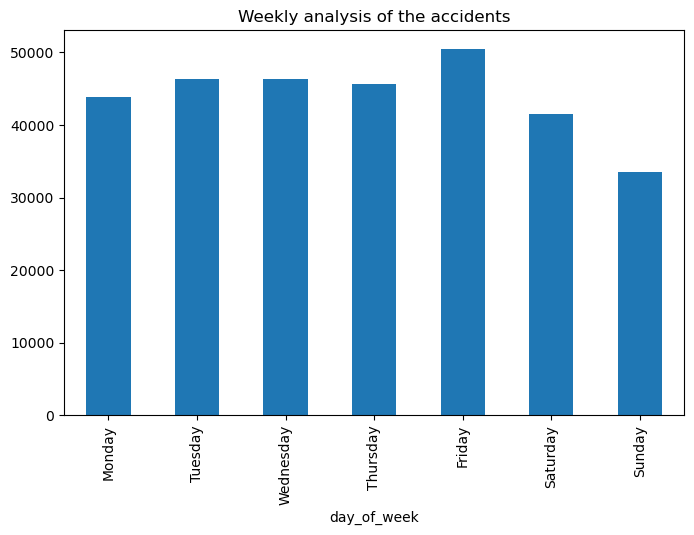

In [55]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accident_df['day_of_week'].value_counts().reindex(day_order).plot(kind='bar', figsize=(8,5))
plt.title('Weekly analysis of the accidents')

In [56]:
vehicles=accident_df['vehicle_type'].value_counts().sort_index()
vehicles

vehicle_type
Agricultural vehicle                        749
Bus or coach (17 or more pass seats)       8686
Car                                      239794
Goods 7.5 tonnes mgw and over              6532
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Motorcycle 125cc and under                 6852
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Motorcycle over 500cc                     11226
Other vehicle                              2516
Pedal cycle                                  66
Ridden horse                                  3
Taxi/Private hire car                      5543
Van / Goods 3.5 tonnes mgw or under       15695
Name: count, dtype: int64

In [57]:
#def custom_autopct(pct):
   # return f'{pct:.1f}' if pct > 0.1 else ''
#It checks:
#➤ If pct > 0.1
#➤ Then return a formatted string with 1 decimal place, like "2.1"
#➤ Else, return an empty string ('') — meaning no label will be shown.
#This is tto prevent values like 0.1 or 0.0 or overlap to overlap with other values

def pie_compare(df, col):
   count=df[col].value_counts()
   #labels = [f'{idx} ({val})' for idx, val in count.items()]
   plt.figure(figsize=(8,6))
   count.plot(kind='pie', autopct='%1.2f%%',  pctdistance=0.8, labeldistance=1.1)
   plt.title(f'pie chart chart of {col}')
   plt.show()

In [58]:
accident_df.columns

Index(['accident_index', 'accident date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards',
       'number_of_casualties', 'number_of_vehicles', 'road_surface_conditions',
       'road_type', 'speed_limit', 'time', 'urban_or_rural_area',
       'weather_conditions', 'vehicle_type', 'time description',
       'acccident season', 'accident_year'],
      dtype='object')

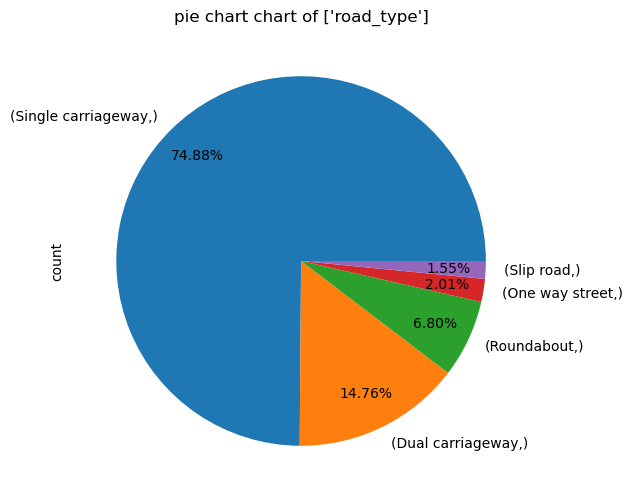

In [ ]:
column=['road_type']#'light_conditions','road_surface_conditions',

pie_compare(accident_df, column)

Bivariate analysis

Scatter plot

Text(0.5, 1.0, 'Number of casualties vs Number of vehicles')

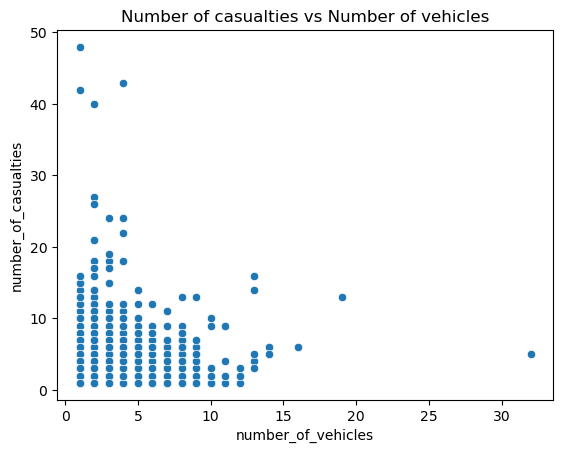

In [60]:
sns.scatterplot(data=accident_df, x='number_of_vehicles', y='number_of_casualties')
plt.title('Number of casualties vs Number of vehicles')

<Axes: xlabel='number_of_vehicles', ylabel='number_of_casualties'>

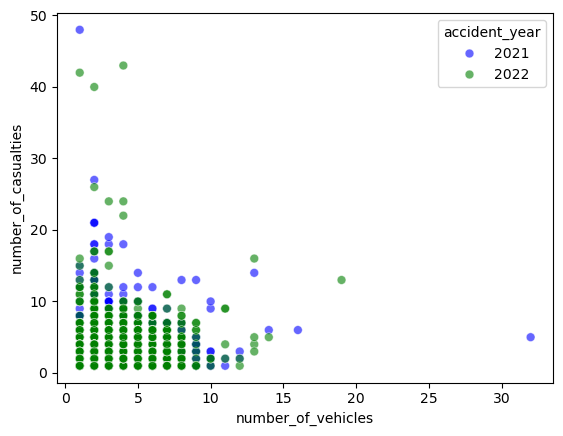

In [61]:
sns.scatterplot(data=accident_df, x='number_of_vehicles', y='number_of_casualties', hue='accident_year', palette=palette,   alpha=0.6,         # transparency
    s=40 )

Visual patterns and relationships

In [62]:
def bar_compare(df, col):
    figure=plt.figure(figsize=(8,6))
    accidents_year = df[df['accident_year'].isin([2021, 2022])]
     # Define color palette for years
    palette = {2021: 'blue', 2022: 'green'}
    #df[col].value_counts().plot(kind='bar')
    sns.countplot(data=df, x=col, color='green', palette=palette, hue='accident_year')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col} in 2021 vs 2022')
    plt.xlabel(f'Frequency plot of {col} ')
    plt.ylabel(f'frequency count of {col}')

In [63]:
accident_df['accident_year'].value_counts()

accident_year
2021    163554
2022    144419
Name: count, dtype: int64

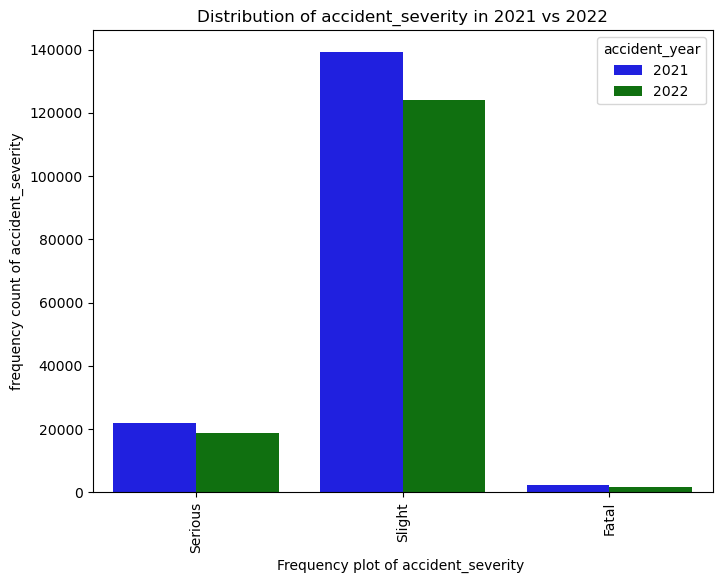

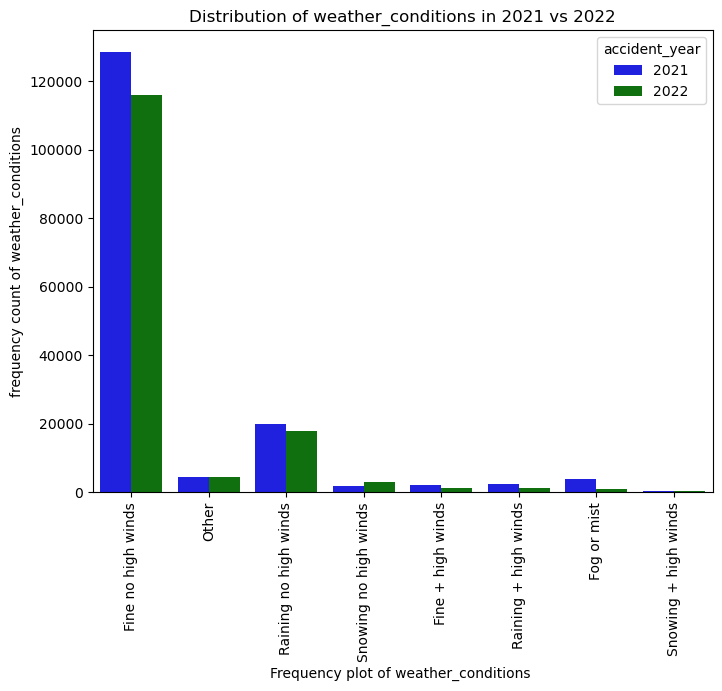

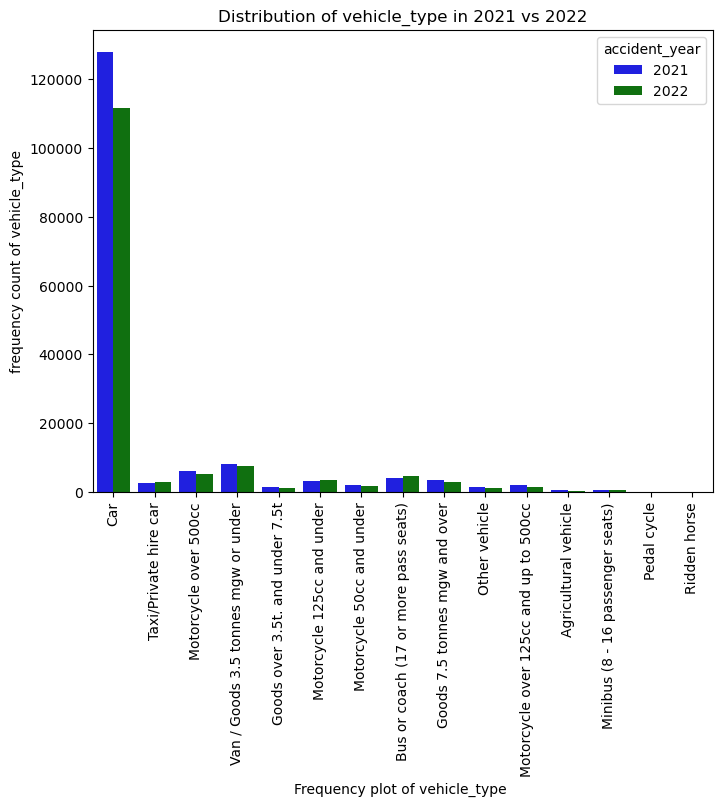

In [ ]:
col=['accident_severity', 'weather_conditions', 'vehicle_type']                      

for i in col:
    bar_compare(accident_df, i)

In [65]:
def bar(df, col):
    figure=plt.figure(figsize=(8,4))
     # Define color palette for years
    #palette = {2021: 'blue', 2022: 'green'}
    #df[col].value_counts().plot(kind='bar')
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'Frequency plot of {col} ')
    plt.ylabel(f'frequency count of {col}')

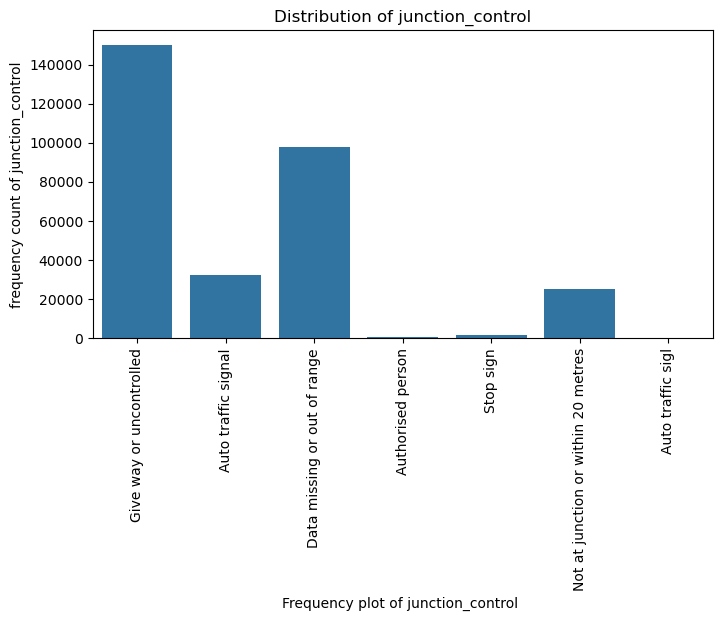

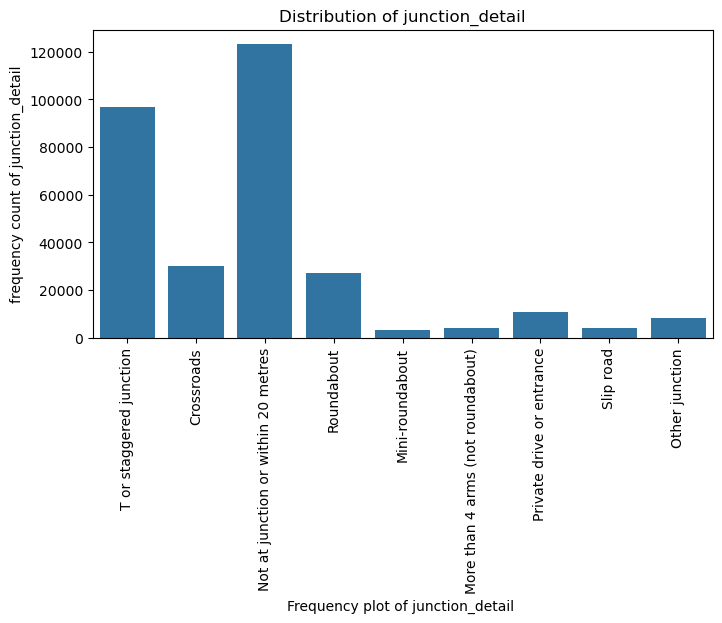

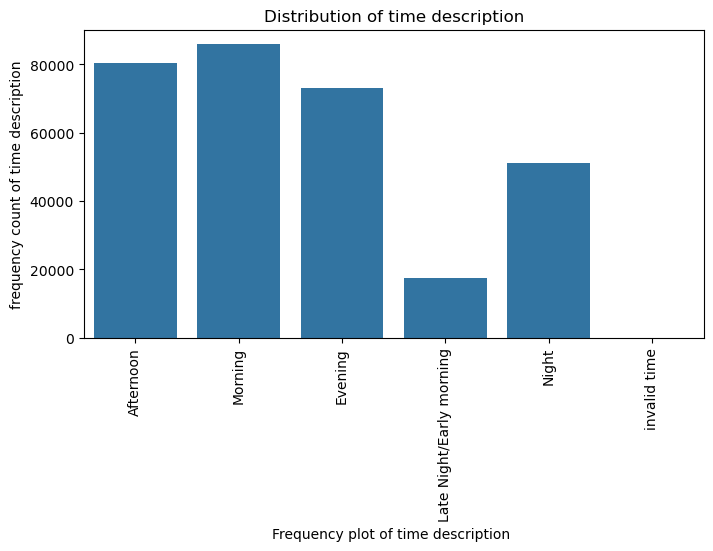

In [66]:
col=['junction_control','junction_detail','time description']

for i in col:
    bar(accident_df, i)

Text(0.5, 1.0, 'Top 10 districts with the most accidents')

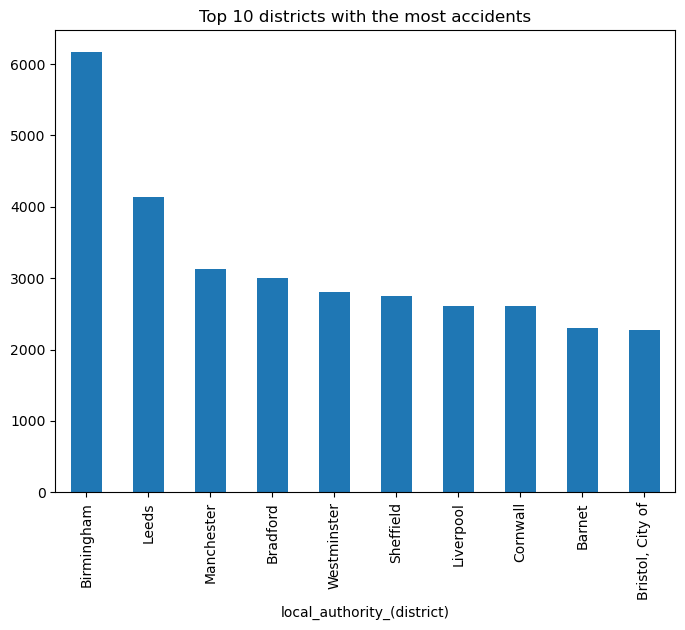

In [67]:
plt.figure(figsize=(8, 6))
top_ten=accident_df['local_authority_(district)'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 districts with the most accidents')

Histogram

<Figure size 1000x600 with 0 Axes>

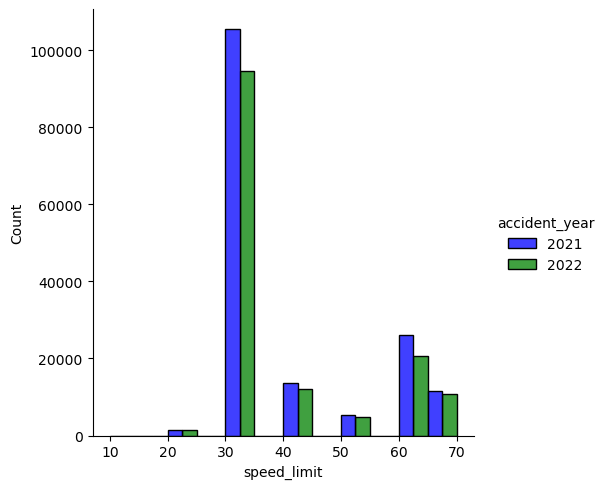

In [68]:
filtered_df = accident_df[accident_df['accident_year'].isin([2021, 2022])]

plt.figure(figsize=(10, 6))
sns.displot(data=filtered_df,kind='hist', x='speed_limit', hue='accident_year', multiple='dodge', palette={2021: 'blue', 2022: 'green'}, binwidth=5)

Text(-21.68055555555555, 0.5, 'Number of vehicle')

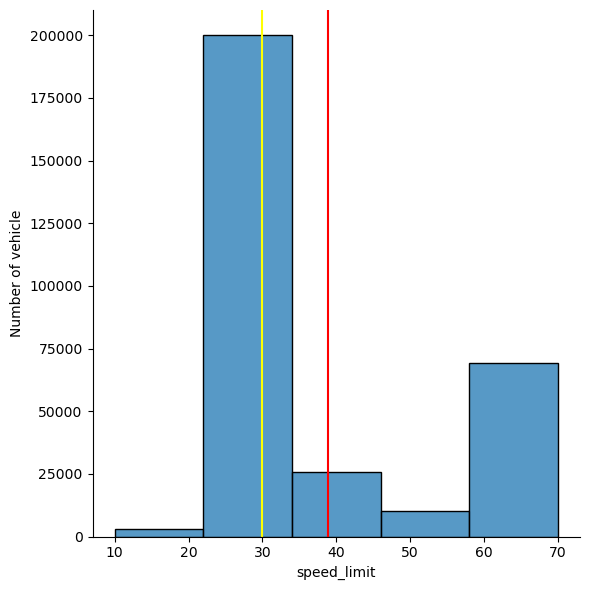

In [69]:
sns.displot(data=accident_df,x='speed_limit', bins=5, height=6)
plt.axvline(accident_df['speed_limit'].mean(), color='red', linestyle='solid', label=np.round(accident_df['speed_limit'].mean(), 2))
plt.axvline(accident_df['speed_limit'].median(), color='yellow', linestyle='solid', label=np.round(accident_df['speed_limit'].mean(), 2))
plt.ylabel("Number of vehicle")

Line Chart

Trends over time

In [70]:
accident_df['accident_month']=accident_df['accident date'].dt.strftime('%B')
accident_df.head()

,accident_index,accident date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority_(district),carriageway_hazards,number_of_casualties,...,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,time description,acccident season,accident_year,accident_month
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,...,One way street,30,15:11:00,Urban,Fine no high winds,Car,Afternoon,Winter,2021,January
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,No Data,11,...,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Morning,Winter,2021,January
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,No Data,1,...,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Afternoon,Winter,2021,January
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,...,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Morning,Winter,2021,January
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,No Data,1,...,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Evening,Winter,2021,January


In [71]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
month= accident_df['accident_month'].value_counts().reindex(month_order)#since britain has seasons, perhaos seasons could play a significnt role
month

accident_month
January      23384
February     21885
March        25543
April        24225
May          26183
June         26748
July         26953
August       25503
September    26752
October      28368
November     29095
December     23334
Name: count, dtype: int64

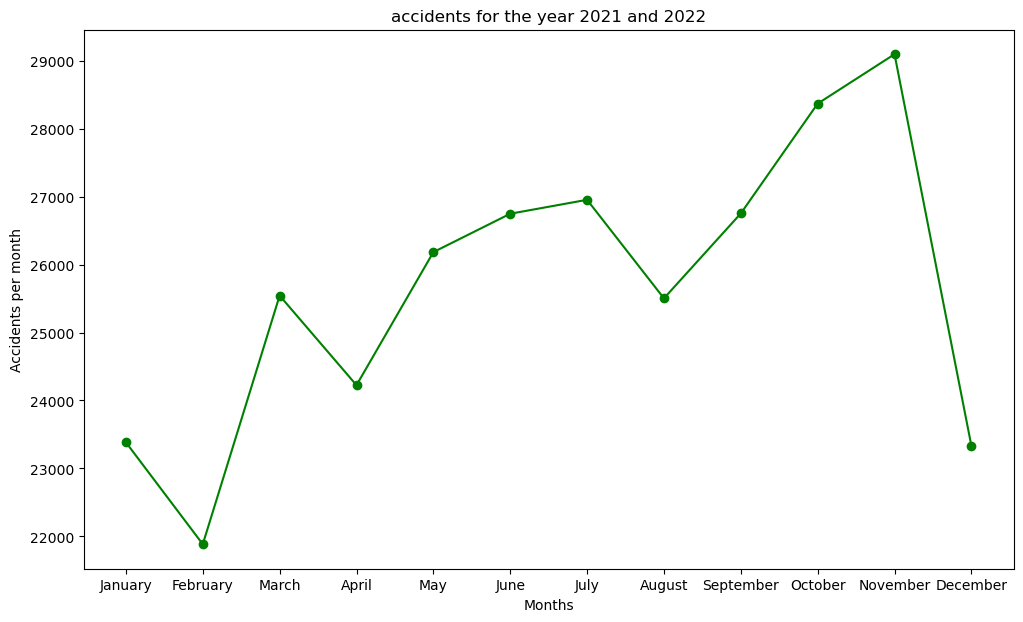

In [72]:
plt.figure(figsize=(12, 7))
plt.plot(month.index, month.values, marker='o', color='green')
plt.xlabel('Months')
plt.ylabel('Accidents per month')
plt.title('accidents for the year 2021 and 2022')
plt.show()

In [73]:
'''plt.figure(figsize=(12, 7))
plt.plot(month.index, month.values, marker='o')
plt.xlabel('Months')
plt.ylabel('Accidents per month')
plt.show()'''

"plt.figure(figsize=(12, 7))\nplt.plot(month.index, month.values, marker='o')\nplt.xlabel('Months')\nplt.ylabel('Accidents per month')\nplt.show()"

In [74]:
accident_2021 = accident_df[accident_df['accident date'].dt.year == 2021]
month_2021= accident_2021['accident_month'].value_counts().reindex(month_order)#since britain has seasons, perhaos seasons could play a significnt role
month_2021

accident_month
January      13417
February     10950
March        13202
April        12715
May          13811
June         13936
July         14300
August       13415
September    13792
October      14834
November     15473
December     13709
Name: count, dtype: int64

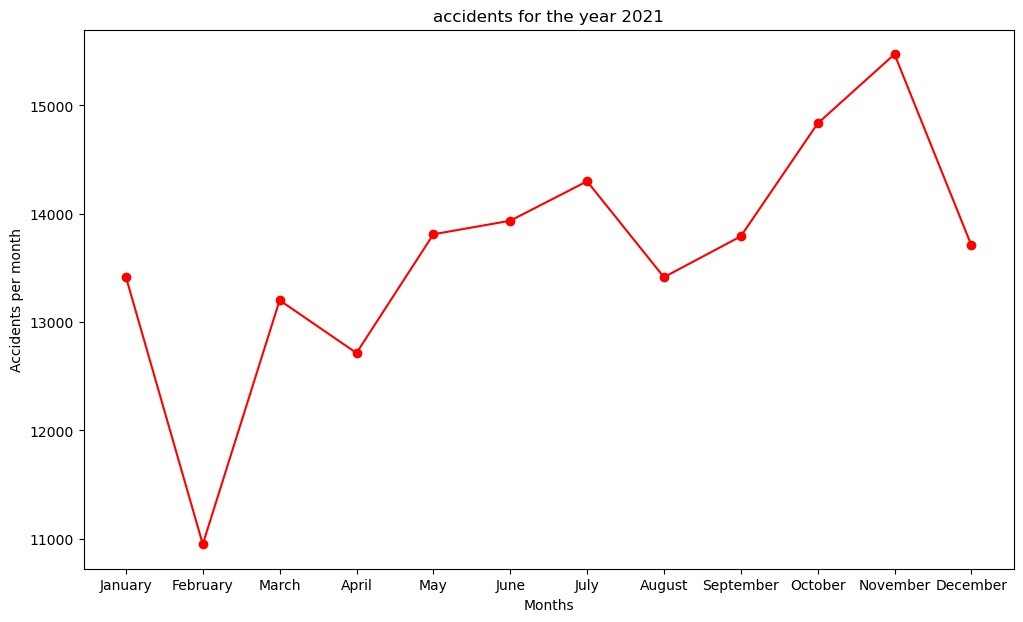

In [75]:
plt.figure(figsize=(12, 7))
plt.plot(month_2021.index, month_2021.values, marker='o', color='red')
plt.xlabel('Months')
plt.ylabel('Accidents per month')
plt.title('accidents for the year 2021')
plt.show()

In [76]:
accident_2022 = accident_df[accident_df['accident date'].dt.year == 2022]
month_2022= accident_2022['accident_month'].value_counts().reindex(month_order)#since britain has seasons, perhaos seasons could play a significnt role
month_2022

accident_month
January       9967
February     10935
March        12341
April        11510
May          12372
June         12812
July         12653
August       12088
September    12960
October      13534
November     13622
December      9625
Name: count, dtype: int64

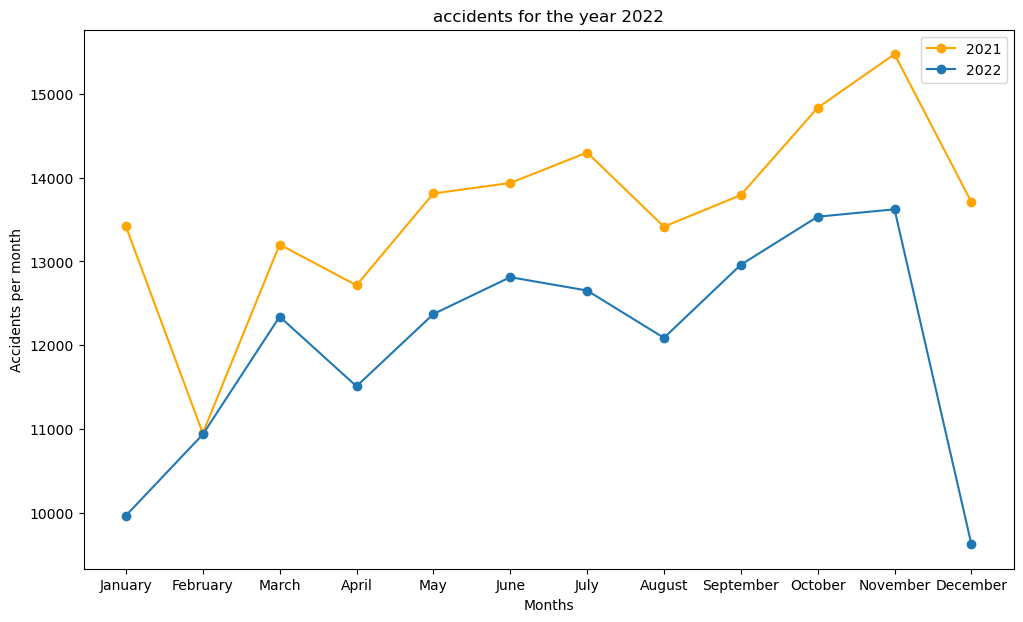

In [77]:
plt.figure(figsize=(12, 7))
plt.plot(month_2021.index, month_2021.values, marker='o', color='orange', label='2021')
plt.plot(month_2022.index, month_2022.values, marker='o', label='2022')
plt.xlabel('Months')
plt.ylabel('Accidents per month')
plt.legend()
plt.title('accidents for the year 2022')
plt.show()

In [78]:
#tab10 for 10 distinct colors
#dark2 for for darker colors

<Figure size 1000x600 with 0 Axes>

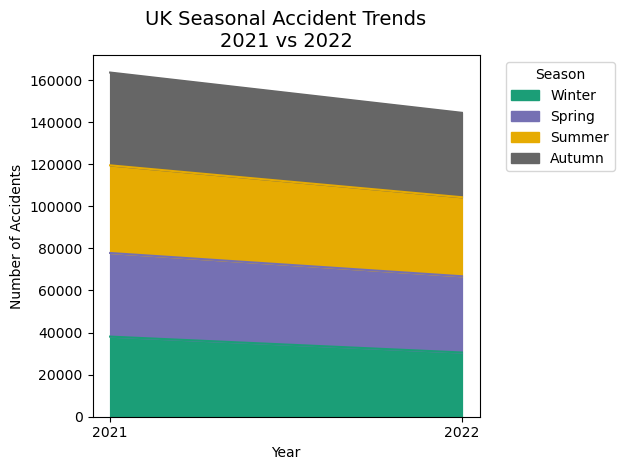

In [79]:
seasonal_by_year = (
    accident_df[accident_df['accident_year'].isin([2021, 2022])].groupby(['accident_year', 'acccident season']).size().unstack()
    .reindex(columns=['Winter', 'Spring', 'Summer', 'Autumn']))

plt.figure(figsize=(10,6))
seasonal_by_year.plot(kind='area',stacked=True,colormap='Dark2',)

plt.title("UK Seasonal Accident Trends\n2021 vs 2022", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks([2021, 2022], ['2021', '2022'])  
plt.legend(title='Season', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [80]:
# Group by year and season
# Fixed column name
# Force season order
# Create the plot with proper formatting
# Add proper labels and titles
# Improve x-axis readability
# Rotate junction labels for better readability
# Align rotated text properly

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'T or staggered junction'),
  Text(0.0, 0, 'Crossroads'),
  Text(1.0, 0, 'Mini-roundabout'),
  Text(2.0, 0, 'More than 4 arms (not roundabout)'),
  Text(3.0, 0, 'Not at junction or within 20 metres'),
  Text(4.0, 0, 'Other junction'),
  Text(5.0, 0, 'Private drive or entrance'),
  Text(6.0, 0, 'Roundabout'),
  Text(7.0, 0, 'Slip road'),
  Text(8.0, 0, 'T or staggered junction'),
  Text(9.0, 0, '')])

<Figure size 1200x700 with 0 Axes>

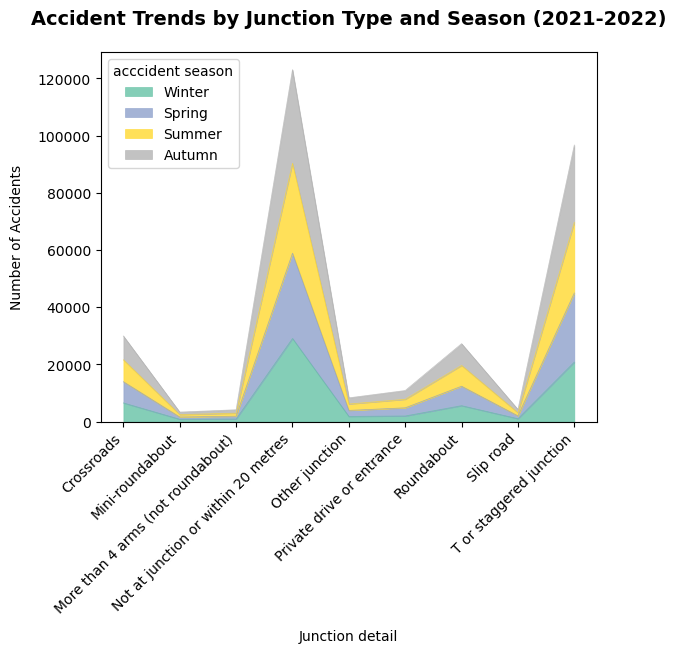

In [81]:
seasonal_by_year = (
    accident_df.groupby(['junction_detail', 'acccident season'])  
    .size()
    .unstack()
    .reindex(columns=['Winter', 'Spring', 'Summer', 'Autumn'])  
)

plt.figure(figsize=(12, 7))
ax = seasonal_by_year.plot(
    kind='area',
    stacked=True,
    colormap='Set2',
    alpha=0.8,
    linewidth=0.5
)

plt.title(
    "Accident Trends by Junction Type and Season (2021-2022)",
    pad=20,
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Junction detail", labelpad=10)
plt.ylabel("Number of Accidents", labelpad=10)

plt.xticks(
    rotation=45,  
    ha='right'    
)

In [82]:
accident_df.columns

Index(['accident_index', 'accident date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards',
       'number_of_casualties', 'number_of_vehicles', 'road_surface_conditions',
       'road_type', 'speed_limit', 'time', 'urban_or_rural_area',
       'weather_conditions', 'vehicle_type', 'time description',
       'acccident season', 'accident_year', 'accident_month'],
      dtype='object')

Handling outliers

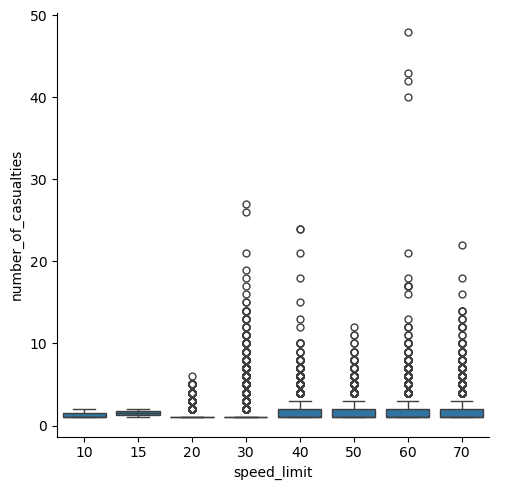

In [83]:
#Handling outlier
sns.catplot(kind='box', data=accident_df,y='number_of_casualties', x='speed_limit')


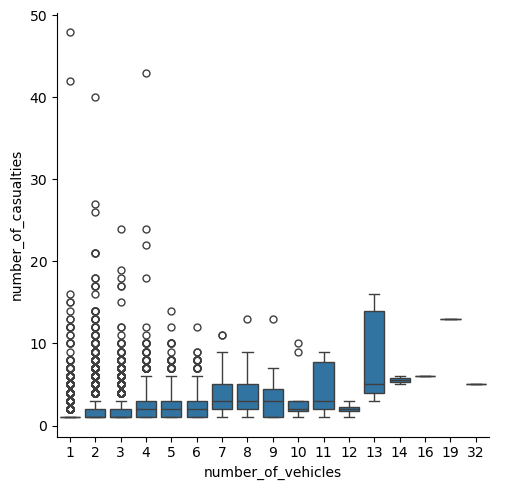

In [84]:
sns.catplot(kind='box', data=accident_df,y='number_of_casualties', x='number_of_vehicles')

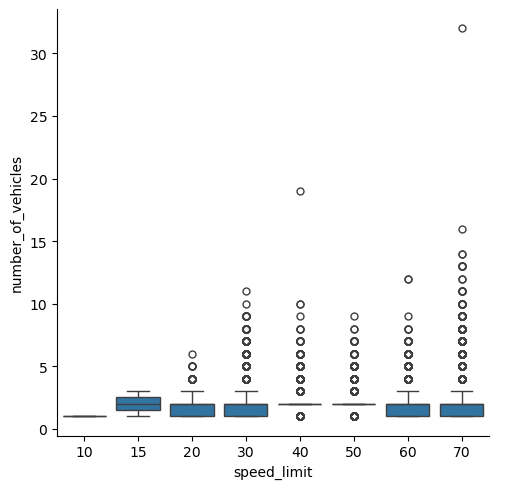

In [85]:
sns.catplot(kind='box', data=accident_df,x='speed_limit', y='number_of_vehicles')

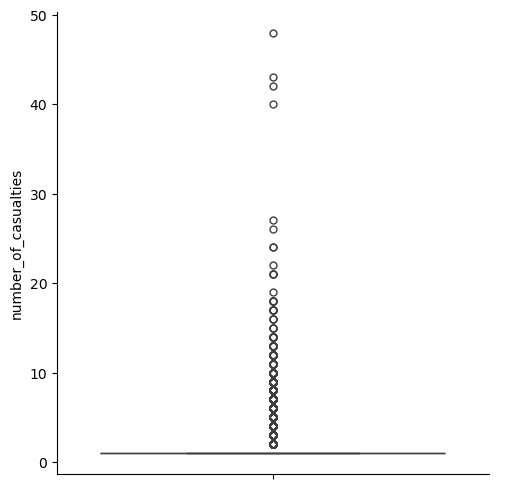

In [86]:
sns.catplot(kind='box', data=accident_df,y='number_of_casualties')#no outliers

In [87]:
#removing or replacing outliers is a bad idea because that would mean removing actual real world data

# IQR 
Q1 = accident_df['number_of_casualties'].quantile(0.25)
Q3 = accident_df['number_of_casualties'].quantile(0.75)
print(Q1)
print(Q3)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
print(lower_bound)
upper_bound = Q3 + (1.5 * IQR)
print(upper_bound)


outlier_iqr =((accident_df['number_of_casualties'] < lower_bound) | (accident_df['number_of_casualties'] > upper_bound)) 
outlier_iqr.head(10)

1.0
1.0
1.0
1.0


0    False
1     True
2    False
3    False
4    False
5     True
6    False
7    False
8     True
9    False
Name: number_of_casualties, dtype: bool

In [88]:
Q1 = accident_df['number_of_vehicles'].quantile(0.25)
Q3 = accident_df['number_of_vehicles'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
print(lower_bound)
upper_bound = Q3 + (1.5 * IQR)
print(upper_bound)


outlier_iqr =((accident_df['number_of_vehicles'] < lower_bound) | (accident_df['number_of_vehicles'] > upper_bound)) 
print(outlier_iqr)

-0.5
3.5
0         False
1         False
2         False
3         False
4         False
          ...  
307968    False
307969    False
307970    False
307971    False
307972    False
Name: number_of_vehicles, Length: 307973, dtype: bool


In [89]:
Q1 = accident_df['speed_limit'].quantile(0.25)
Q3 = accident_df['speed_limit'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
print(lower_bound)
upper_bound = Q3 + (1.5 * IQR)
print(upper_bound)


outlier_iqr =((accident_df['speed_limit'] < lower_bound) | (accident_df['speed_limit'] > upper_bound)) 
print(outlier_iqr)

0.0
80.0
0         False
1         False
2         False
3         False
4         False
          ...  
307968    False
307969    False
307970    False
307971    False
307972    False
Name: speed_limit, Length: 307973, dtype: bool


In [90]:
    # Append rows to the empty DataFrame
    #outlier_df = pd.concat([outlier_df, rows_with_outliers], ignore_index=True)
        # Keep only rows with outliers and keep the boolean flags
 # Select numeric columns
# Create empty DataFrame with numeric columns
 # Create outlier mask
 # Filter rows with at least one outlier

In [91]:
def get_alloutliers(df):
   
    num_cols = df.select_dtypes(include='number').columns
    
    
    outlier_df = pd.DataFrame(columns=num_cols)
    
   
    outlier_mask = pd.DataFrame(False, index=df.index, columns=num_cols)
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
   
    rows_with_outliers = outlier_mask.any(axis=1)
    

    outlier_df = outlier_mask.loc[rows_with_outliers].reset_index(drop=True)
    
    return outlier_df

outliers_df = get_alloutliers(accident_df)
outliers_df

,number_of_casualties,number_of_vehicles,speed_limit,accident_year
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
75902,True,False,False,False
75903,True,True,False,False
75904,True,False,False,False
75905,True,False,False,False


In [92]:

def get_outlier_boolean_mask(df):
    # Select only numeric columns
    num_cols = df.select_dtypes(include='number').columns

    # Create empty mask (all False)
    outlier_mask = pd.DataFrame(False, index=df.index, columns=num_cols)

    # Apply IQR method for each numeric column
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_mask[col] = (df[col] < lower) | (df[col] > upper)

    # Filter only rows that have at least one True
    outlier_rows = outlier_mask[outlier_mask.any(axis=1)].reset_index(drop=True)

    return outlier_rows

get_outlier_boolean_mask(accident_df)

,number_of_casualties,number_of_vehicles,speed_limit,accident_year
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
75902,True,False,False,False
75903,True,True,False,False
75904,True,False,False,False
75905,True,False,False,False


Correlation analysis

Heatmaps 

In [93]:
accident_df.columns

Index(['accident_index', 'accident date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards',
       'number_of_casualties', 'number_of_vehicles', 'road_surface_conditions',
       'road_type', 'speed_limit', 'time', 'urban_or_rural_area',
       'weather_conditions', 'vehicle_type', 'time description',
       'acccident season', 'accident_year', 'accident_month'],
      dtype='object')

Text(0.5, 1.0, 'Correlation heatmap ')

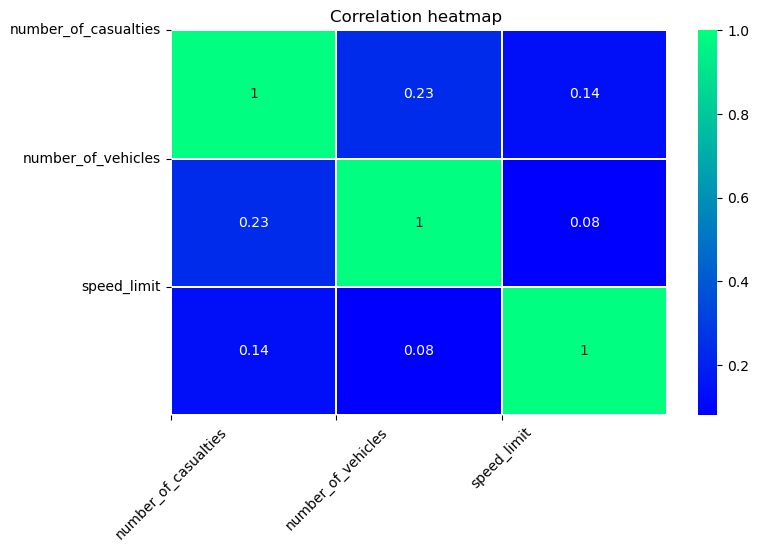

In [94]:

selected_df=accident_df[['number_of_casualties', 'number_of_vehicles', 'speed_limit' ]]                          #only numeric columns
corr_matrix=selected_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,cmap='winter', annot=True, linewidths=0.2)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)                                    #to adjust and sets marks and label
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation heatmap ")

In [95]:
                                                                                            # 5️⃣ Variance Inflation Factor (Multicollinearity check)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(selected_df)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif)



Variance Inflation Factors:
               Variable        VIF
0                 const  14.854959
1  number_of_casualties   1.074210
2    number_of_vehicles   1.060795
3           speed_limit   1.021655


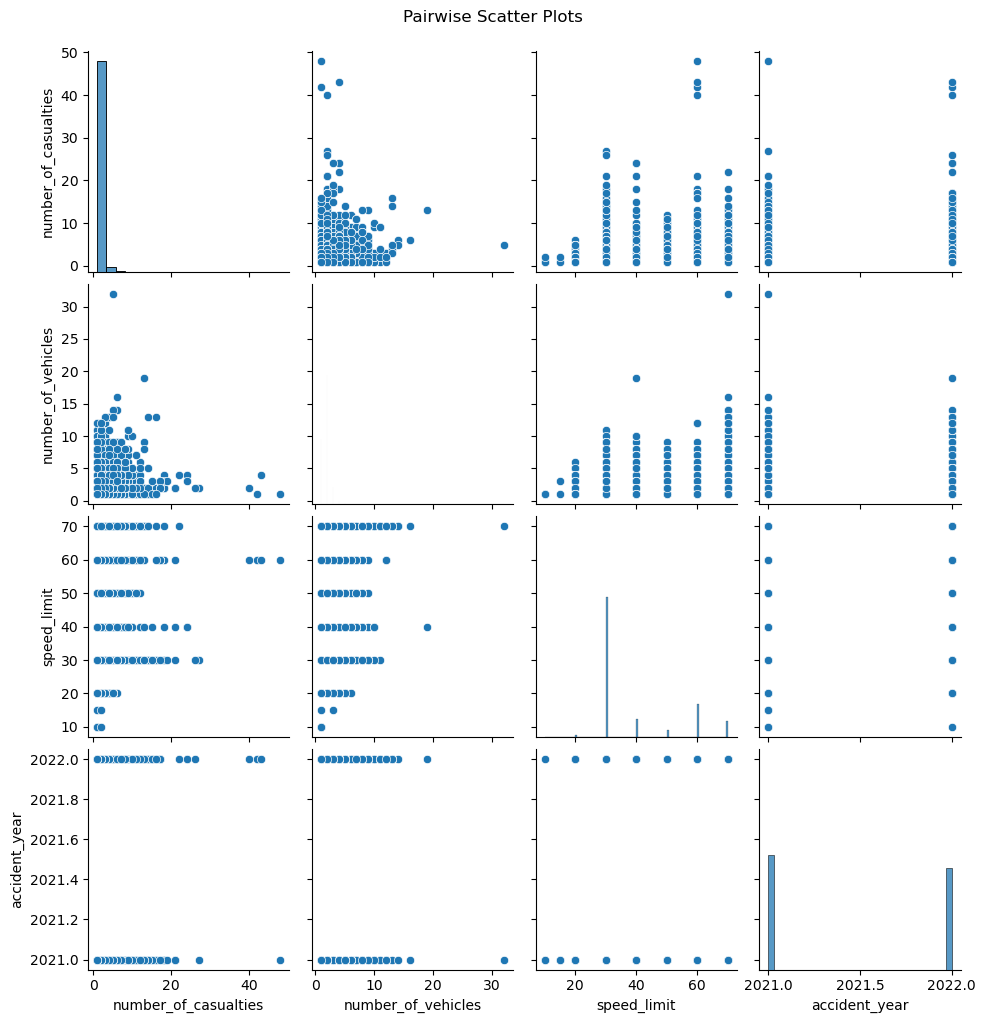

In [96]:
sns.pairplot(accident_df)
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

Text(0.5, 1.0, 'Correlation heatmap')

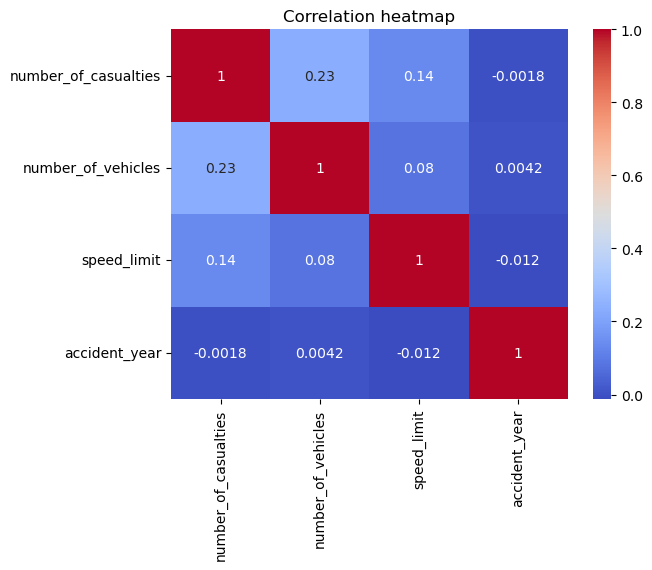

In [97]:
accident_df.corr(numeric_only=True)

sns.heatmap(accident_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')

In [98]:
print(accident_df.duplicated().sum())

0


<Axes: xlabel='accident_severity', ylabel='speed_limit'>

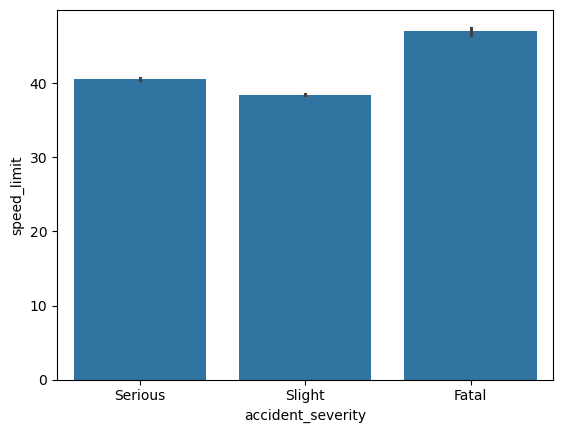

In [99]:
sns.barplot(data=accident_df,x='accident_severity', y='speed_limit')

In [100]:
y=accident_df[accident_df['number_of_casualties']>40]
y

,accident_index,accident date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority_(district),carriageway_hazards,number_of_casualties,...,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,time description,acccident season,accident_year,accident_month
131785,BS0131786,2021-12-22,Tuesday,Not at junction or within 20 metres,Not at junction or within 20 metres,Fatal,Darkness - no lighting,Cornwall,No Data,48,...,Single carriageway,60,22:10:00,Rural,Other,Van / Goods 3.5 tonnes mgw or under,Night,Winter,2021,December
254965,BS0254966,2022-12-24,Friday,Data missing or out of range,Not at junction or within 20 metres,Serious,Daylight,Broadland,No Data,42,...,Single carriageway,60,15:30:00,Rural,Fine no high winds,Car,Afternoon,Winter,2022,December
306912,BS0306913,2022-09-24,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Ceredigion,No Data,43,...,Dual carriageway,60,08:17:00,Rural,Fine no high winds,Car,Morning,Autumn,2022,September


In [101]:
accident_df

,accident_index,accident date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority_(district),carriageway_hazards,number_of_casualties,...,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,time description,acccident season,accident_year,accident_month
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,...,One way street,30,15:11:00,Urban,Fine no high winds,Car,Afternoon,Winter,2021,January
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,No Data,11,...,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Morning,Winter,2021,January
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,No Data,1,...,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Afternoon,Winter,2021,January
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,No Data,1,...,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Morning,Winter,2021,January
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,No Data,1,...,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Evening,Winter,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,No Data,2,...,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car,Morning,Winter,2022,February
307969,BS0307970,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,No Data,1,...,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car,Late Night/Early morning,Winter,2022,February
307970,BS0307971,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Highland,No Data,1,...,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car,Morning,Winter,2022,February
307971,BS0307972,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,Darkness - no lighting,Highland,No Data,1,...,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc,Evening,Winter,2022,February


In [102]:
accident_df['acccident season'].value_counts()

acccident season
Autumn    84215
Summer    79204
Spring    75951
Winter    68603
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

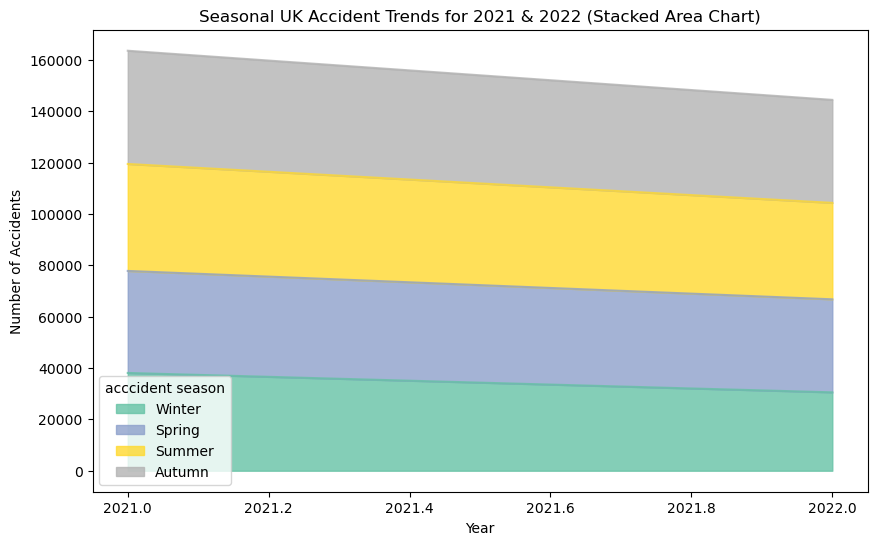

In [103]:
# Group by year and season
seasonal_by_year = accident_df.groupby(['accident_year', 'acccident season']).size().unstack().reindex(columns=['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot stacked area chart
seasonal_by_year.plot(kind='area', stacked=True, figsize=(10, 6), colormap='Set2', alpha=0.8)
plt.title("Seasonal UK Accident Trends for 2021 & 2022 (Stacked Area Chart)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

<Figure size 1200x700 with 0 Axes>

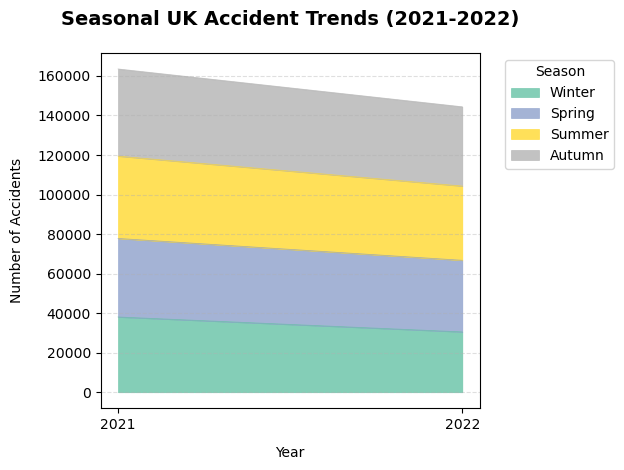

In [104]:
seasonal_by_year = (
    accident_df.groupby(['accident_year', 'acccident season'])  # Fixed typo in 'accident_season'
    .size()
    .unstack()
    .reindex(columns=['Winter', 'Spring', 'Summer', 'Autumn'])  # Ensures consistent season order
)

# Create the stacked area plot
plt.figure(figsize=(12, 7))  # Slightly larger figure for better readability
seasonal_by_year.plot(
    kind='area',
    stacked=True,
    colormap='Set2',
    alpha=0.8,
    linewidth=0.5  # Adds subtle borders between areas
)

# Enhance the plot aesthetics
plt.title("Seasonal UK Accident Trends (2021-2022)", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Year", labelpad=10)
plt.ylabel("Number of Accidents", labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)  # Light grid lines for better value estimation

# Improve x-axis formatting
plt.xticks(
    ticks=seasonal_by_year.index, 
    labels=[str(int(year)) for year in seasonal_by_year.index],  # Ensure clean year labels
    rotation=0
)

# Add legend outside the plot area
plt.legend(
    title='Season',
    bbox_to_anchor=(1.05, 1),  # Positions legend to right of plot
    loc='upper left'
)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


In [105]:
accident_df.columns

Index(['accident_index', 'accident date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards',
       'number_of_casualties', 'number_of_vehicles', 'road_surface_conditions',
       'road_type', 'speed_limit', 'time', 'urban_or_rural_area',
       'weather_conditions', 'vehicle_type', 'time description',
       'acccident season', 'accident_year', 'accident_month'],
      dtype='object')

In [106]:
accident_df.rename(columns={'accident_index': 'Accident_Index'}, inplace=True)

In [107]:
'''columns_needed=['Accident_Index','Latitude', 'Longitude']
raw_subset = original_df[columns_needed]#take from original dataframe since the columns mentioned are delted
complete_df=accident_df.merge(raw_subset, on='Accident_Index', how='left')#statrt from index and move left
complete_df.to_csv('Final_accident.csv', index=False)'''

"columns_needed=['Accident_Index','Latitude', 'Longitude']\nraw_subset = original_df[columns_needed]#take from original dataframe since the columns mentioned are delted\ncomplete_df=accident_df.merge(raw_subset, on='Accident_Index', how='left')#statrt from index and move left\ncomplete_df.to_csv('Final_accident.csv', index=False)"